In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import MeanShift, KMeans
from sklearn.metrics import silhouette_score

I imported all the necessary libraries.
- pandas - manage and read data.
- matplotlib.pyplot - to plot data and show graph
- numpy - create array
- sklearn.cluster - Meanshift model, and KMeans model
- sklearn.metrics.silhouette_score - to calculate performance of my prediction.


In [136]:
df = pd.read_csv('dd_tt_02.txt', header=None)

I use pandas to read 'dd_tt_02.txt' and store in a variable called df. Since there are no header in the txt file I read, I turned it off.

In [137]:
clustering = MeanShift().fit(df)

I user sklearn.cluster's MeanShift() method/model, with my data in df as parameter. From this mean shift model I want to estimate the number of clusters there are in this data set. There are multiple ways I found, and I used all of the methods I found just to be sure I have the correct number of clusters.

In [138]:
predict = clustering.predict(df)
labels_unique = np.unique(predict)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)
print('predicted: ', predict)

number of estimated clusters : 4
predicted:  [0 0 3 1 2 0 0 0 3 1 2 3 0 0 3 1 2 0 0 0 3 1 2]


One method of estimating cluster is by predicting the model with my data. The output is an array of labels for each data points. Then I use numpy to count the number of unique value in the array, and I get an array of all the unique label found in the predicted array. The unique array is [0, 1, 2, 3]. The length is 4, so the estimated cluster is 4.
<br/>
<br/>number of estimated clusters : 4
<br/>predicted:  [0 0 3 1 2 0 0 0 3 1 2 3 0 0 3 1 2 0 0 0 3 1 2]

In [139]:
cluster_centers = clustering.cluster_centers_
n_clusters_ = len(cluster_centers)
print("number of estimated clusters : %d" % n_clusters_)
print('cluster_centers: ', cluster_centers)

number of estimated clusters : 4
cluster_centers:  [[2.58333333 4.85444444]
 [9.33       3.72      ]
 [7.622      7.428     ]
 [6.746      1.794     ]]


Next method is by counting the numbers of centers in the model. I get an array of centers from clustering.cluster_centers_. Then I did the same thing and count the number of centers. I have 4 clusters.
<br/>
<br/>number of estimated clusters : 4
<br/>cluster_centers:  [[2.58333333 4.85444444]
 [9.33       3.72      ]
 [7.622      7.428     ]
 [6.746      1.794     ]]


C:\Users\serey\AppData\Local\Temp\ipykernel_15468\2753648236.py:9: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='blue', edgecolors='black', linewidth=1, marker='+')
C:\Users\serey\AppData\Local\Temp\ipykernel_15468\2753648236.py:12: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(class_3[:, 0], class_3[:, 1], s=75, facecolors='yellow', edgecolors='black', linewidth=1, marker='x')


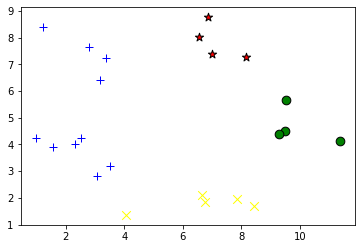

In [140]:
new_df = df.copy()
new_df[2] = predict

class_0 = np.array(new_df[(new_df[2])==0])
class_1 = np.array(new_df[(new_df[2])==1])
class_2 = np.array(new_df[(new_df[2])==2])
class_3 = np.array(new_df[(new_df[2])==3])

plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='blue', edgecolors='black', linewidth=1, marker='+')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='green', edgecolors='black', linewidth=1, marker='o')
plt.scatter(class_2[:, 0], class_2[:, 1], s=75, facecolors='red', edgecolors='black', linewidth=1, marker='*')
plt.scatter(class_3[:, 0], class_3[:, 1], s=75, facecolors='yellow', edgecolors='black', linewidth=1, marker='x')
plt.show()

I graphed the predicted label value for each data point to show how all clusters are kind of separated from each other.

In [141]:
kmeans = KMeans(n_clusters=3).fit(df)

I use K-means clustering to divide the data points into three different clusters. I use K-means model from sklearn.cluster. I did the same thing as the mean shift model I used except that this time I set the number of cluster to 3 instead of allowing the model to calculate/estimate its own number of cluster.

C:\Users\serey\AppData\Local\Temp\ipykernel_15468\289386401.py:10: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='blue', edgecolors='black', linewidth=1, marker='+')


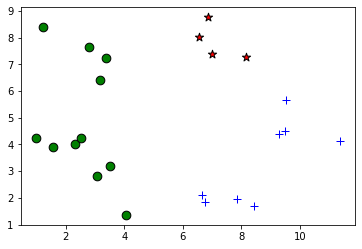

In [142]:
kmeans_predict = kmeans.predict(df)

new_df = df.copy()
new_df[2] = kmeans_predict

class_0 = np.array(new_df[(new_df[2])==0])
class_1 = np.array(new_df[(new_df[2])==1])
class_2 = np.array(new_df[(new_df[2])==2])

plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='blue', edgecolors='black', linewidth=1, marker='+')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='green', edgecolors='black', linewidth=1, marker='o')
plt.scatter(class_2[:, 0], class_2[:, 1], s=75, facecolors='red', edgecolors='black', linewidth=1, marker='*')
plt.show()

I graphed the predicted label value for each data point. When compared this graph to the mean shift graph, the fourth lebels (yellow, 'x') gets replaced by other labels.

In [143]:
silhouette_score_meanshift = silhouette_score(df, clustering.labels_)
print('MeanShift silhouette score = ', silhouette_score_meanshift)

silhouette_score_kmean = silhouette_score(df, kmeans.labels_)
print('Kmean silhouette score = ', silhouette_score_kmean)



MeanShift silhouette score =  0.5072073009631013
Kmean silhouette score =  0.47721408530488957


I calculated the sulhouette score to compare meanshift with 4 clusters to kmeans with 3 clusters. The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. The result shows that meanshift has a higher score of 0.5072073009631013 compared to kmeans score of 0.46366475002256474. <br/>

<br/>MeanShift silhouette score =  0.5072073009631013
<br/>Kmean silhouette score =  0.46366475002256474

C:\Users\serey\AppData\Local\Temp\ipykernel_15468\354401376.py:11: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='blue', edgecolors='black', linewidth=1, marker='+')


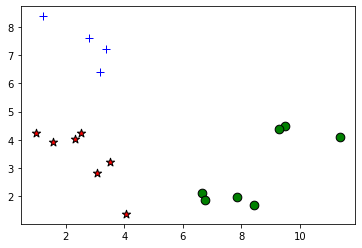

MeanShift silhouette score =  0.5072073009631013
Kmean silhouette score =  0.4968538089048822


In [144]:
kmeans = KMeans(n_clusters=4).fit(df)
kmeans_predict = kmeans.predict(df)

new_df = df.copy()
new_df[2] = kmeans_predict

class_0 = np.array(new_df[(new_df[2])==0])
class_1 = np.array(new_df[(new_df[2])==1])
class_2 = np.array(new_df[(new_df[2])==2])

plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='blue', edgecolors='black', linewidth=1, marker='+')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='green', edgecolors='black', linewidth=1, marker='o')
plt.scatter(class_2[:, 0], class_2[:, 1], s=75, facecolors='red', edgecolors='black', linewidth=1, marker='*')
plt.show()

silhouette_score_meanshift = silhouette_score(df, clustering.labels_)
print('MeanShift silhouette score = ', silhouette_score_meanshift)

silhouette_score_kmean = silhouette_score(df, kmeans.labels_)
print('Kmean silhouette score = ', silhouette_score_kmean)

I tried this time set the cluster of Kmeans to 4 because MeanShift has a better score with 4 clusters. I did not change anything in MeanShift. Kmean has a higher silhouette score with 4 clusters than MeanShift with the same amount of 4 clusters.<br/>

MeanShift tunes it's own hyper parameter which means that it finds its own clusters.<br/>
Kmeans, I need to tune the hyper parameter in order to make it perform better.<br/>

<br/>MeanShift silhouette score =  0.5072073009631013
<br/>Kmean silhouette score =  0.5262264148709318